In [3]:
#Import stuff
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import pystokes
import pyforces

## Stresslet flow

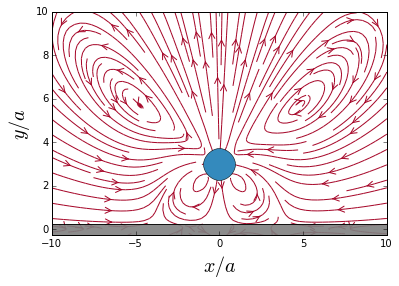

In [7]:
#Stokeslet flow in plane perpendicular to the no-slip surface

%matplotlib inline
a, eta, dim = 1, 1.0/6, 3
L, Ng = 10, 32

Np, Nt = 1, Ng*Ng
r = np.zeros(3*Np)
p = np.zeros(3*Np)
S = np.zeros(5*Np)
rt = np.zeros(dim*Nt)                   # Memory Allocation for field points

xx = np.linspace(-L, L, Ng)
yy = np.linspace(-L, L, Ng)
X, Y = np.meshgrid(xx, yy)
rt[Nt:3*Nt] = np.concatenate((X.reshape(Ng*Ng), Y.reshape(Ng*Ng)))

p[2*Np:3*Np]=-1
h,  S0 = 3, 1
r[0], r[1], r[2]= 0, 0, h
p[0], p[1], p[2]= 0, 0, 1

for i in range(Np):
    S[i]      = S0*(p[i]*p[i] -(1.0/3))
    S[i+ Np]  = S0*(p[i + Np]*p[i + Np] -(1.0/3))
    S[i+ 2*Np]  = S0*(p[i]*p[i + Np])
    S[i+ 3*Np] = S0*(p[i]*p[i + 2*Np])
    S[i+ 4*Np] = S0*(p[i + Np]*p[i + 2*Np])

####Instantiate the Flow class
wFlow = pystokes.wallBounded.Flow(a, eta, Np, Nt)

vv = np.zeros(dim*Nt)                   # Memory Allocation for field Velocities
wFlow.stressletV(vv, rt, r, S)
vx, vy, vz = vv[0:Nt].reshape(Ng, Ng), vv[Nt:2*Nt].reshape(Ng, Ng), vv[2*Nt:3*Nt].reshape(Ng, Ng)


##Plotting
plt.figure()
plt.plot(r[0], r[2], marker='o', markerfacecolor='#348ABD', markersize=32 )   # plot the particle at r
plt.streamplot(X, Y, vy, vz, color="#A60628", density=2, arrowstyle='->', arrowsize =1.5)
ww=0.25; plt.xlim([-L, L])
plt.ylim([-ww, L])
plt.xlabel(r'$x/a$', fontsize=20)
plt.ylabel(r'$y/a$', fontsize=20)
plt.axhspan(-ww, ww, facecolor='0.5', alpha=0.9);

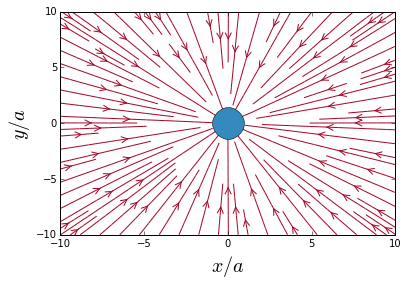

In [4]:
#Stokeslet flow in plane perpendicular to the no-slip surface

%matplotlib inline
a, eta, dim = 1, 1.0/6, 3
L, Ng = 10, 32

Np, Nt = 1, Ng*Ng
r = np.zeros(3*Np)
p = np.zeros(3*Np)
S = np.zeros(5*Np)
rt = np.zeros(dim*Nt)                   # Memory Allocation for field points

xx = np.linspace(-L, L, Ng)
yy = np.linspace(-L, L, Ng)
X, Y = np.meshgrid(xx, yy)
rt[0:2*Nt] = np.concatenate((X.reshape(Ng*Ng), Y.reshape(Ng*Ng)))


h,  S0 = 2.5, 1
rt[2*Nt:3*Nt]=h
r[0], r[1], r[2]= 0, 0, h
p[0], p[1], p[2]= 0, 0, 1

for i in range(Np):
    S[i]      = S0*(p[i]*p[i] -(1.0/3))
    S[i+ Np]  = S0*(p[i + Np]*p[i + Np] -(1.0/3))
    S[i+ 2*Np]  = S0*(p[i]*p[i + Np])
    S[i+ 3*Np] = S0*(p[i]*p[i + 2*Np])
    S[i+ 4*Np] = S0*(p[i + Np]*p[i + 2*Np])

####Instantiate the Flow class
wFlow = pystokes.wallBounded.Flow(a, eta, Np, Nt)

vv = np.zeros(dim*Nt)                   # Memory Allocation for field Velocities
wFlow.stressletV(vv, rt, r, S)
vx, vy = vv[0:Nt].reshape(Ng, Ng), vv[Nt:2*Nt].reshape(Ng, Ng)


##Plotting
plt.figure()
plt.plot(r[0], r[1], marker='o', markerfacecolor='#348ABD', markersize=32 )   # plot the particle at r
plt.streamplot(X, Y, vx, vy, color="#A60628", density=1.2, arrowstyle='->', arrowsize =1.5)
plt.xlim([-L, L]); plt.ylim([-L, L])
plt.xlabel(r'$x/a$', fontsize=20); plt.ylabel(r'$y/a$', fontsize=20);

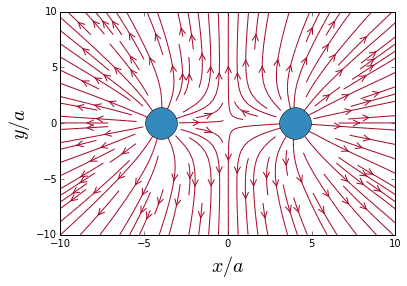

In [4]:
#Stokeslet flow in plane perpendicular to the no-slip surface

%matplotlib inline
a, eta, dim = 1, 1.0/6, 3
L, Ng = 10, 32

Np, Nt = 2, Ng*Ng
r = np.zeros(3*Np)
p = np.zeros(3*Np)
S = np.zeros(5*Np)
rt = np.zeros(dim*Nt)                   # Memory Allocation for field points

xx = np.linspace(-L, L, Ng)
yy = np.linspace(-L, L, Ng)
X, Y = np.meshgrid(xx, yy)
rt[0:2*Nt] = np.concatenate((X.reshape(Ng*Ng), Y.reshape(Ng*Ng)))


h,   S0 = 2.5,  -1
rt[2*Nt:3*Nt]=h
r[0], r[1] = -4, 4
r[2*Np], r[2*Np+1] = h, h
p[2*Np], p[2*Np+1] = 1, 1

for i in range(Np):
    S[i]       = S0*(p[i]*p[i] -(1.0/3))
    S[i+ Np]   = S0*(p[i + Np]*p[i + Np] -(1.0/3))
    S[i+ 2*Np] = S0*(p[i]*p[i + Np])
    S[i+ 3*Np] = S0*(p[i]*p[i + 2*Np])
    S[i+ 4*Np] = S0*(p[i + Np]*p[i + 2*Np])

####Instantiate the Flow class
wFlow = pystokes.wallBounded.Flow(a, eta, Np, Nt)

vv = np.zeros(dim*Nt)                   # Memory Allocation for field Velocities
wFlow.stressletV(vv, rt, r, S )
vx, vy = vv[0:Nt].reshape(Ng, Ng), vv[Nt:2*Nt].reshape(Ng, Ng)


##Plotting
plt.figure()
plt.plot(r[0], r[0+Np], marker='o', markerfacecolor='#348ABD', markersize=32 )   # plot the particle at r
plt.plot(r[1], r[1+Np], marker='o', markerfacecolor='#348ABD', markersize=32 )   # plot the particle at r


plt.streamplot(X, Y, vx, vy, color="#A60628", density=1.2, arrowstyle='->', arrowsize =1.5)
plt.xlim([-L, L]); plt.ylim([-L, L])
plt.xlabel(r'$x/a$', fontsize=20); plt.ylabel(r'$y/a$', fontsize=20);

## Chain of particles near a wall

In [1]:
#Stokeslet flow in plane perpendicular to the no-slip surface

%matplotlib inline
a, eta, dim = 1, 1.0/6, 3
L, Ng = 64, 64

Np, Nt = 21, Ng*Ng
r = np.zeros(3*Np)
p = np.zeros(3*Np)
S = np.zeros(5*Np)
rt = np.zeros(dim*Nt)                   # Memory Allocation for field points

xx = np.linspace(-L, L, Ng)
yy = np.linspace(-L, L, Ng)
X, Y = np.meshgrid(xx, yy)
rt[0:2*Nt] = np.concatenate((X.reshape(Ng*Ng), Y.reshape(Ng*Ng)))


h, S0 = 2.5,   1
rt[2*Nt:3*Nt]=h
rr=Np
r[:Np] = -2*(Np-1) + 4*np.arange(Np)
r[2*Np:3*Np]= h
p[2*Np: 3*Np] = -1

for i in range(Np):
    S[i]       = S0*(p[i]*p[i] -(1.0/3))
    S[i+ Np]   = S0*(p[i + Np]*p[i + Np] -(1.0/3))
    S[i+ 2*Np] = S0*(p[i]*p[i + Np])
    S[i+ 3*Np] = S0*(p[i]*p[i + 2*Np])
    S[i+ 4*Np] = S0*(p[i + Np]*p[i + 2*Np])

####Instantiate the Flow class
wFlow = pystokes.wallBounded.Flow(a, eta, Np, Nt)

vv = np.zeros(dim*Nt)                   # Memory Allocation for field Velocities
wFlow.stressletV(vv, rt, r, p)
vx, vy = vv[0:Nt].reshape(Ng, Ng), vv[Nt:2*Nt].reshape(Ng, Ng)


##Plotting
plt.figure()
plt.plot(r[:Np], r[Np:2*Np], marker='o', markerfacecolor='#348ABD', markersize=8 )   # plot the particle at r


plt.streamplot(X, Y, vx, vy, density=1, color="#A60628", arrowstyle='->', arrowsize =1.5)
plt.xlim([-L, L]); plt.ylim([-L, L])
plt.xlabel(r'$x/a$', fontsize=20); plt.ylabel(r'$y/a$', fontsize=20);

NameError: name 'np' is not defined

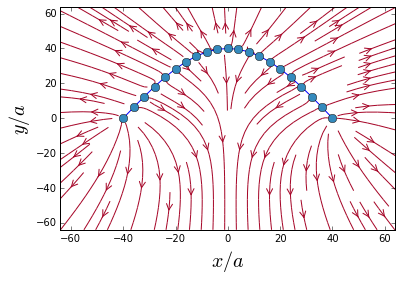

In [14]:
#Stokeslet flow in plane perpendicular to the no-slip surface

%matplotlib inline
a, eta, dim = 1, 1.0/6, 3
L, Ng = 64, 64

Np, Nt = 21, Ng*Ng
r = np.zeros(3*Np)
p = np.zeros(3*Np)
S = np.zeros(5*Np)
rt = np.zeros(dim*Nt)                   # Memory Allocation for field points

xx = np.linspace(-L, L, Ng)
yy = np.linspace(-L, L, Ng)
X, Y = np.meshgrid(xx, yy)
rt[0:2*Nt] = np.concatenate((X.reshape(Ng*Ng), Y.reshape(Ng*Ng)))


h,  S0 = 2.5, -1
rt[2*Nt:3*Nt]=h
rr=Np
r[:Np] = -2*(Np-1) + 4*np.arange(Np)
r[Np:2*Np] = 40*np.cos(np.linspace(-np.pi/2, np.pi/2, Np))
r[2*Np:3*Np]= h
p[2*Np: 3*Np] = 1

for i in range(Np):
    S[i]       = S0*(p[i]*p[i] -(1.0/3))
    S[i+ Np]   = S0*(p[i + Np]*p[i + Np] -(1.0/3))
    S[i+ 2*Np] = S0*(p[i]*p[i + Np])
    S[i+ 3*Np] = S0*(p[i]*p[i + 2*Np])
    S[i+ 4*Np] = S0*(p[i + Np]*p[i + 2*Np])

####Instantiate the Flow class
wFlow = pystokes.wallBounded.Flow(a, eta, Np, Nt)

vv = np.zeros(dim*Nt)                   # Memory Allocation for field Velocities
wFlow.stressletV(vv, rt, r, S)
vx, vy = vv[0:Nt].reshape(Ng, Ng), vv[Nt:2*Nt].reshape(Ng, Ng)


##Plotting
plt.figure()
plt.plot(r[:Np], r[Np:2*Np], marker='o', markerfacecolor='#348ABD', markersize=8 )   # plot the particle at r


plt.streamplot(X, Y, vx, vy, density=1, color="#A60628", arrowstyle='->', arrowsize =1.5)
plt.xlim([-L, L]); plt.ylim([-L, L])
plt.xlabel(r'$x/a$', fontsize=20); plt.ylabel(r'$y/a$', fontsize=20);

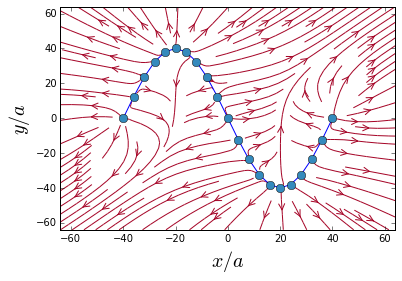

In [7]:
#Stokeslet flow in plane perpendicular to the no-slip surface

%matplotlib inline
a, eta, dim = 1, 1.0/6, 3
L, Ng = 64, 64

Np, Nt = 21, Ng*Ng
r = np.zeros(3*Np)
p = np.zeros(3*Np)
S = np.zeros(5*Np)
rt = np.zeros(dim*Nt)                   # Memory Allocation for field points

xx = np.linspace(-L, L, Ng)
yy = np.linspace(-L, L, Ng)
X, Y = np.meshgrid(xx, yy)
rt[0:2*Nt] = np.concatenate((X.reshape(Ng*Ng), Y.reshape(Ng*Ng)))


h, S0 = 2.5, -1
rt[2*Nt:3*Nt]=h
rr=Np
r[:Np] = -2*(Np-1) + 4*np.arange(Np)
r[Np:2*Np] = 40*np.sin(np.linspace(0, 2*np.pi, Np))
r[2*Np:3*Np]= h
p[2*Np: 3*Np] = 1

for i in range(Np):
    S[i]       = S0*(p[i]*p[i] -(1.0/3))
    S[i+ Np]   = S0*(p[i + Np]*p[i + Np] -(1.0/3))
    S[i+ 2*Np] = S0*(p[i]*p[i + Np])
    S[i+ 3*Np] = S0*(p[i]*p[i + 2*Np])
    S[i+ 4*Np] = S0*(p[i + Np]*p[i + 2*Np])

####Instantiate the Flow class
wFlow = pystokes.wallBounded.Flow(a, eta, Np, Nt)

vv = np.zeros(dim*Nt)                   # Memory Allocation for field Velocities
wFlow.stressletV(vv, rt, r, S)
vx, vy = vv[0:Nt].reshape(Ng, Ng), vv[Nt:2*Nt].reshape(Ng, Ng)


##Plotting
plt.figure()
plt.plot(r[:Np], r[Np:2*Np], marker='o', markerfacecolor='#348ABD', markersize=8 )   # plot the particle at r


plt.streamplot(X, Y, vx, vy, density=1, color="#A60628", arrowstyle='->', arrowsize =1.5)
plt.xlim([-L, L]); plt.ylim([-L, L])
plt.xlabel(r'$x/a$', fontsize=20); plt.ylabel(r'$y/a$', fontsize=20);

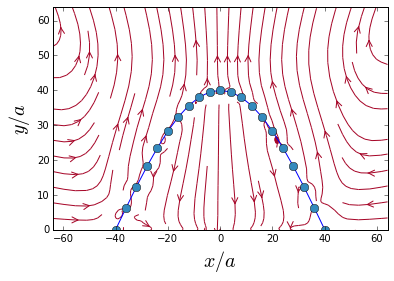

In [17]:
#Stokeslet flow in plane perpendicular to the no-slip surface

%matplotlib inline
a, eta, dim = 1, 1.0/6, 3
L, Ng = 64, 64

Np, Nt = 21, Ng*Ng
r = np.zeros(3*Np)
p = np.zeros(3*Np)
S = np.zeros(5*Np)
rt = np.zeros(dim*Nt)                   # Memory Allocation for field points

xx = np.linspace(-L, L, Ng)
yy = np.linspace(-L, L, Ng)
X, Y = np.meshgrid(xx, yy)
rt[Nt:3*Nt] = np.concatenate((X.reshape(Ng*Ng), Y.reshape(Ng*Ng)))


h,  S0 = 2.5, 1
#rt[2*Nt:3*Nt]=h
rr=Np
r[Np:2*Np] = -2*(Np-1) + 4*np.arange(Np)
r[2*Np:3*Np] = 40*np.cos(np.linspace(-np.pi/2, np.pi/2, Np))
p[2*Np: 3*Np] = 1

for i in range(Np):
    S[i]       = S0*(p[i]*p[i] -(1.0/3))
    S[i+ Np]   = S0*(p[i + Np]*p[i + Np] -(1.0/3))
    S[i+ 2*Np] = S0*(p[i]*p[i + Np])
    S[i+ 3*Np] = S0*(p[i]*p[i + 2*Np])
    S[i+ 4*Np] = S0*(p[i + Np]*p[i + 2*Np])

####Instantiate the Flow class
wFlow = pystokes.wallBounded.Flow(a, eta, Np, Nt)

vv = np.zeros(dim*Nt)                   # Memory Allocation for field Velocities
wFlow.stressletV(vv, rt, r, S)
vx, vy, vz = vv[0:Nt].reshape(Ng, Ng), vv[Nt:2*Nt].reshape(Ng, Ng), vv[2*Nt:3*Nt].reshape(Ng, Ng)


##Plotting
plt.figure()
plt.plot( r[Np:2*Np], r[2*Np:3*Np], marker='o', markerfacecolor='#348ABD', markersize=8 )   # plot the particle at r


plt.streamplot(X, Y, vy, vz, density=1, color="#A60628", arrowstyle='->', arrowsize =1.5)
plt.xlim([-L, L]); plt.ylim([-0, L])
plt.xlabel(r'$x/a$', fontsize=20); plt.ylabel(r'$y/a$', fontsize=20);